# Question 1

The D-dimensional Schwefel function:

$$f(x_1, x_2, \cdots,x_D) = 418.9829D - \sum_i^D x_i\sin(\sqrt{|x_i|})$$

where $x_i\in[-500, 500]$ for $i=1,2,\cdots,D$.

The global minimum is 0, which is reached at $x_i=420.9687$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Schwefel(X):
    return 418.9829 * len(X) - np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=0)

def plot_surface(func, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x,y = np.meshgrid(a, b)
    z = func((x, y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(x, y, z)

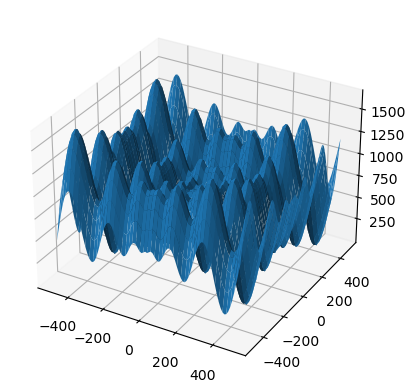

In [3]:
plot_surface(Schwefel, -500, 500, -500, 500)

In [4]:
def SA(solution, func, schedule, delta, boundary, n_iter=10, report_interval=None):
    """
    Simulated Annealing for minimization
    
    Parameters
    ----------
    solution: np.ndarray
        Initial guess
    func: Callable
        Function to minimize
    schedule: np.ndarray
        An array of temperatures for simulated annealing
    delta: float
        Magnitude of random displacement
    boundary: tuple
        Boundary of the variables to minimize. (lowerbound,upperbound)
    n_iter: int
        Number of random displacement move in each temperature
    report_interavl: int
        Number of temperature steps to report result
    
    Returns
    -------
    res: dict
        Minimized point and its evaulation value
    """
    
    best_solution = solution.copy()
    lowest_eval = func(best_solution)
    
    for idx, temp in enumerate(schedule):
        if report_interval is not None and ((idx + 1) % report_interval == 0 or idx == 0):
            msg = (
                f"{idx + 1}/{len(schedule)}, Temp: {temp:.2f}, "
                f"Best solution: {best_solution}, Value: {lowest_eval:.7f}"
            )
            print(msg)
        
        for n in range(n_iter):
            trial = solution.copy()
            trial += delta * (2 * np.random.random(trial.shape) - 1)
            if np.all(trial >= boundary[0]) and np.all(trial <= boundary[1]):
                # fill in acceptance criterion
                if np.exp(-(func(trial) - func(solution)) / temp) > np.random.random():
                    solution = trial
                    if func(solution) < lowest_eval:
                        # update solution here
                        best_solution = solution.copy()
                        lowest_eval = func(best_solution)
                        
    return {"solution":best_solution, "evaluation":lowest_eval}

In [49]:
starting = 500 * (np.random.random(10) * 2 - 1)

## (a)

*For debugging*: 

Length of schedule 5941 for 30K, 5981 for 10K (both initial temperature and final temperature are included in the schedule). The function evaluation of your solution usually falls in the range of 2000~4000 with `delta=0.5` and `n_iter=10`. 

In [50]:
def linear_cooling(init_temp, final_temp, alpha):
    steps = int((init_temp - final_temp) / alpha)
    return np.linspace(init_temp, final_temp, steps)

In [60]:
# Print average & standard deviation of minimized values of 3 runs
cooling_schedule_30k = linear_cooling(3000, 30, 0.5)
cooling_schedule_10k = linear_cooling(3000, 10, 0.5)

sa_values_30k = []
sa_values_10k = []

for _ in range(3):
    
    SA_result_30k = SA(solution=starting, 
        func=Schwefel, 
        schedule=cooling_schedule_30k, 
        delta=0.5, 
        boundary=(-500, 500))
    
    SA_result_10k = SA(solution=starting, 
        func=Schwefel, 
        schedule=cooling_schedule_10k, 
        delta=0.5, 
        boundary=(-500, 500))
    
    sa_values_30k.append(SA_result_30k["solution"])
    sa_values_10k.append(SA_result_10k["solution"])
    
print(f"Minimized values at 30K: {np.mean(np.array(sa_values_30k))} +/- {np.std(np.array(sa_values_30k))}")
print(f"Minimized values at 10K: {np.mean(np.array(sa_values_10k))} +/- {np.std(np.array(sa_values_10k))}")

Minimized values at 30K: 30.068192854194862 +/- 233.38165541048005
Minimized values at 10K: 17.727488067907487 +/- 245.5967336904705


Yes, we find better solutions when cooling to the lower temperature.

## (b)

*For debugging*:

The final temperature should be 326.10415680714726 (starting from 6000K) or 309.29382323518576 (starting from 3000K).

In [59]:
def log_cooling(init_temp, sigma, k):
    schedule = []
    for _ in range(k):
        schedule.append( init_temp / (1 + init_temp * np.log(1 + k) / (3 * sigma) ) )
    return np.array(schedule)

In [61]:
# Print average & standard deviation of minimized values of 3 runs
log_schedule_6000 = log_cooling(6000, 1000, 6000)
log_schedule_3000 = log_cooling(3000, 1000, 6000)

sa_values_6000 = []
sa_values_3000 = []

for _ in range(3):
    
    SA_result_6000 = SA(solution=starting, 
        func=Schwefel, 
        schedule=log_schedule_6000, 
        delta=0.5, 
        boundary=(-500, 500))
    
    SA_result_3000 = SA(solution=starting, 
        func=Schwefel, 
        schedule=log_schedule_3000, 
        delta=0.5, 
        boundary=(-500, 500))
    
    sa_values_6000.append(SA_result_6000["solution"])
    sa_values_3000.append(SA_result_3000["solution"])
    
print(f"Minimized values starting from 6000K: {np.mean(np.array(sa_values_6000))} +/- {np.std(np.array(sa_values_6000))}")
print(f"Minimized values starting from 3000K: {np.mean(np.array(sa_values_3000))} +/- {np.std(np.array(sa_values_3000))}")

Minimized values starting from 6000K: 28.594261519143995 +/- 234.57778180703733
Minimized values starting from 3000K: 34.60342908597266 +/- 224.48736942092523


In this case, log gcooling does not converge better than linear cooling. Log cooling converges to about 28 and 34, while linear cooling converged to lower values of about 30 and 17.

# Question 2

## (a)

Solutions 3, 4, and 5 are good solutions from both encoding A and B. In encoding A, this corresponds to the vectors 1000, 0010, and 0001. In encoding B, this corresponds to the vectors 1101, 1011, and 1111. In encoding A, these good solutions correspond to the schema * 0 * * . The order is 1 and length is 2-2 = 0. In encoding B, these good solutions correspond to the schema 1 * * 1. The order is 2 and the length is 4-1 = 3. To ensure less variation, I would choose encoding B since it has a higher order. If instead we wanted more variation, I would choose encoding A.

## (b)

In [69]:
import pandas as pd


solution_dict = {
    "1011": 0, "0011": 1, "1001": 2, "1000": 3,
    "0010": 4, "0001": 5, "0000": 6, "1010": 7,
    "0100": 8, "1100": 9, "0101":10, "0110":11,
    "0111":12, "1101":13, "1110":14, "1111":15
}


def func(vec):
    x = solution_dict[vec]
    return -x ** 2 + 8 * x + 15


def one_point_crossover(parent1, parent2, point):
    # hint: use string slicing (with []) and concatenation ("+")
    parent1_slice1 = parent1[:point]
    parent1_slice2 = parent1[point:]
    
    parent2_slice1 = parent2[:point]
    parent2_slice2 = parent2[point:]
    
    return (parent1_slice1 + parent2_slice2, parent2_slice1 + parent1_slice2)
    
def evaluate_population(pop):
    df = pd.DataFrame({
        "Solutions": [solution_dict[vec] for vec in pop],
        "Vectors": pop,
        "Fitness": [func(vec) for vec in pop]
    })
    df.sort_values(by=["Fitness"], ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    print(f"Total Fitness: {np.sum(df['Fitness'])}")
    print(f"Best Solution: {df.loc[0, 'Solutions']} (with fitness {df.loc[0, 'Fitness']})")
    return df

*For debugging*: Use the following function to test `one_point_crossover()`

In [70]:
def test_one_point_crossover():
    c1, c2 = one_point_crossover("0000", "1111", 1)
    if {c1, c2} == {"1000", "0111"}:
        print("Well done!")
    else:
        raise Exception("Wrong implementation")

test_one_point_crossover()

Well done!


*Useful things:* sort a population according to its evaluation

In [71]:
p = ["0000", "1111", "1110"]
p.sort(key=func)
print("After sort:", p)

After sort: ['1111', '1110', '0000']


Let's say we use encoding A since the schema provides more variation. For x = 10, the encoding is 0101 and fitness is -5. For x = 1, the encoding is 0011 and fitness is 22. For x = 15, the encoding is 1111 and fitness is -90. For x = 6, the encoding is 0000 and fitness is 27. For x = 0, the encoding is 1011 and fitness is 15. For x = 9, the encoding is 1100 and fitness is 6. Pairing the most fit members with the least fit members, we have the pairings (6,15), (1,10), (0,9).

## (c)

In [76]:
c1, c2 = one_point_crossover("0000", "1111", 1)
c3, c4 = one_point_crossover("0011", "0101", 1)
c5, c6 = one_point_crossover("1011", "1100", 1)

old_encodings = ["0000", "1111", "0011", "0101", "1011", "1100"]
evaluate_population(np.array(old_encodings))

new_encodings = [c1, c2, c3, c4, c5, c6]
evaluate_population(np.array(new_encodings))

Total Fitness: -25
Best Solution: 6 (with fitness 27)
Total Fitness: 35
Best Solution: 3 (with fitness 30)


,Solutions,Vectors,Fitness
0,3,1000,30
1,1,0011,22
2,0,1011,15
3,9,1100,6
4,10,0101,-5
5,12,0111,-33


We do have new solutions, and their fitness can be seen in the dataframe above. We have increased the fitness of the popoulation to 35, and the best solution is now 3.

## (d)

In [81]:
def mutate(vec, point):
    char = vec[point]
    if (char == '1'):
        new_char = '0' # mutate "1" to "0"
    else:
        new_char = '1' # mutate "0" to "1"
    
    new_vec = vec[:point] + new_char + vec[(point+1):]
    
    return new_vec

*For debugging*: Use the following function to test `mutate()`

In [82]:
def test_mutate():
    if "0000" == mutate("0100", 1):
        print("Well done")
    else:
        raise Exception("Wrong implementation")
    
test_mutate()

Well done


In [128]:
third_encoding = []
for i in range(6):
    third_encoding.append(mutate(new_encodings[i], 3))
df = evaluate_population(np.array(third_encoding))
evaluate_population(np.array(third_encoding))

Total Fitness: 27
Best Solution: 4 (with fitness 31)
Total Fitness: 27
Best Solution: 4 (with fitness 31)


,Solutions,Vectors,Fitness
0,4,0010,31
1,2,1001,27
2,7,1010,22
3,8,0100,15
4,11,0110,-18
5,13,1101,-50


In this case, mutation did not increase the fitness of the population as a whole. Our fitness (27) was worse than the previous fitness (35). We did however find a better solution of 4 with fitness 31. 

## (e)

In [106]:
def two_point_crossover(parent1, parent2):
    # hint: use string slicing (with []) and concatenation ("+")
    parent1_slice1 = parent1[:1]
    parent1_slice2 = parent1[1:3]
    parent1_slice3 = parent1[3:]
    
    parent2_slice1 = parent2[:1]
    parent2_slice2 = parent2[1:3]
    parent2_slice3 = parent2[3:]
    
    return (parent1_slice1 + parent2_slice2 + parent1_slice3, parent2_slice1 + parent1_slice2 + parent2_slice3)


*For debugging*: Use the following function to test `two_point_crossover()`

In [107]:
def test_two_point_crossover():
    c1, c2 = two_point_crossover("0000", "1111")
    if {c1, c2} == {"0110", "1001"}:
        print("Well done")
    else:
        raise Exception("Wrong implementation")

test_two_point_crossover()

Well done


In [129]:
min_value = df['Fitness'].min()
df = df[df['Fitness'] != min_value]

df.loc[len(df.index)] = [4, "0010", 31]
df

,Solutions,Vectors,Fitness
0,4,0010,31
1,2,1001,27
2,7,1010,22
3,8,0100,15
4,11,0110,-18
5,4,0010,31


In [133]:
c1, c2 = two_point_crossover("0010", "0110")
c3, c4 = two_point_crossover("0010", "0100")
c5, c6 = two_point_crossover("1001", "1010")

fourth_encodings = [c1, c2, c3, c4, c5, c6]
df = evaluate_population(np.array(fourth_encodings))
evaluate_population(np.array(fourth_encodings))

Total Fitness: 104
Best Solution: 4 (with fitness 31)
Total Fitness: 104
Best Solution: 4 (with fitness 31)


,Solutions,Vectors,Fitness
0,4,0010,31
1,4,0010,31
2,3,1000,30
3,8,0100,15
4,0,1011,15
5,11,0110,-18


We have new solutions, and their fitnesses can be seen above. We have increased the fitness of the poopulation as a whole to 104. We did not find a better solution, it stayed the same as before. 

## (f)

In [134]:
min_value = df['Fitness'].min()
df = df[df['Fitness'] != min_value]

df.loc[len(df.index)] = [4, "0010", 31]
df

,Solutions,Vectors,Fitness
0,4,0010,31
1,4,0010,31
2,3,1000,30
3,8,0100,15
4,0,1011,15
5,4,0010,31


In [135]:
c1, c2 = one_point_crossover("0010", "1011", 4)
c3, c4 = one_point_crossover("0010", "1011", 4)
c5, c6 = one_point_crossover("0010", "1000", 4)

fifth_encodings = [c1, c2, c3, c4, c5, c6]
evaluate_population(np.array(fifth_encodings))

Total Fitness: 153
Best Solution: 4 (with fitness 31)


,Solutions,Vectors,Fitness
0,4,0010,31
1,4,0010,31
2,4,0010,31
3,3,1000,30
4,0,1011,15
5,0,1011,15


We have new solutions, and their fitnesses can be seen above. We have increased the fitness of the poopulation as a whole to 153. We did not find a better solution, it stayed the same as before. 

## (g)

Yes, I do think that the encoding of the solution space was adequate. After several generations of cross-overs and mutations, the population was able to find the best solution and also reach a high fitness level. This was becuase the encoding allowed for enough variation as a result of a schema with lower perfect conservation. 